In [301]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [302]:
df_airline = pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [303]:
# Check for null values
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [304]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [305]:
# drop null value
df_airline.drop(axis=0, index=144, inplace=True)

In [306]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [307]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [308]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [309]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [310]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [311]:
# Set Month column as an index
df_airline.set_index('Month', inplace=True)

In [312]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

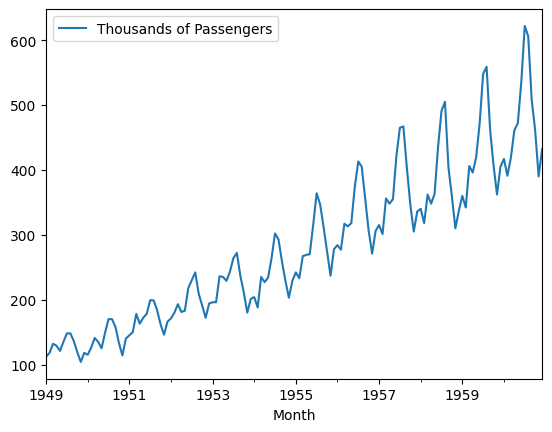

In [313]:
df_airline.plot()

In [314]:
# Dickey fuller test
from statsmodels.tsa.stattools import adfuller

In [315]:
def adf_test(series):
    result = adfuller(series)
    print('adf Statictics : {}'.format(result[0]))
    print('p- value : {}'.format(result[1]))
    if result[1] <= 0.5:
        print('Strong evidance against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.')
    else:
        print('Week evidance against null hypothesis, time series has a unit root, indicating it is non-stationary.')
        

In [316]:
adf_test(df_airline['Thousands of Passengers'])

adf Statictics : 0.8153688792060482
p- value : 0.991880243437641
Week evidance against null hypothesis, time series has a unit root, indicating it is non-stationary.


In [317]:
# Converting non stationarity to stationarity
# Use techniques Differencing(1st differencing)
df_airline['Passenger first difference'] = df_airline['Thousands of Passengers'] - df_airline['Thousands of Passengers'].shift(1)


In [318]:
df_airline.head()

,Thousands of Passengers,Passenger first difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [319]:
adf_test(df_airline['Passenger first difference'].dropna())

adf Statictics : -2.8292668241699994
p- value : 0.0542132902838255
Strong evidance against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.


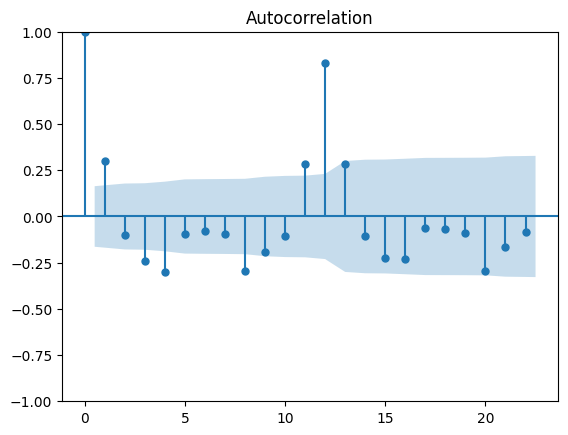

In [320]:
acf1 = plot_acf(df_airline['Passenger first difference'].dropna())

In [321]:
# Use techniques Differencing(2nd differencing)
df_airline['Passenger 2nd difference'] = df_airline['Passenger first difference'] - df_airline['Passenger first difference'].shift(1)

In [322]:
df_airline.head()

,Thousands of Passengers,Passenger first difference,Passenger 2nd difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [323]:
adf_test(df_airline['Passenger 2nd difference'].dropna())

adf Statictics : -16.384231542468505
p- value : 2.7328918500142407e-29
Strong evidance against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.


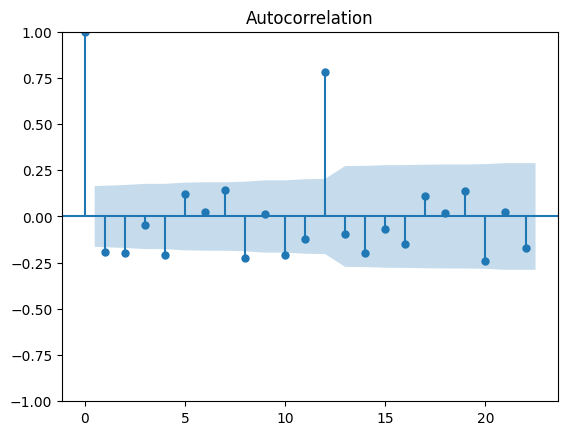

In [324]:
acf2 = plot_acf(df_airline['Passenger 2nd difference'].dropna())

In [325]:
# If seasonal data we take 12 months
# Seasonal difference
df_airline['Passenger 12 difference'] = df_airline['Thousands of Passengers'] - df_airline['Thousands of Passengers'].shift(12)

In [326]:
adf_test(df_airline['Passenger 12 difference'].dropna())

adf Statictics : -3.383020726492481
p- value : 0.011551493085514954
Strong evidance against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary.


In [327]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

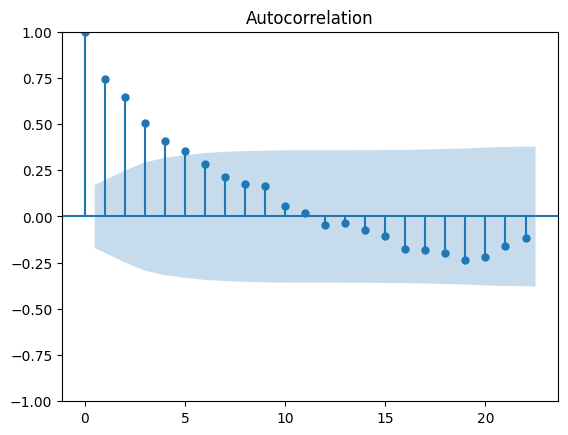

In [328]:
acf12 = plot_acf(df_airline['Passenger 12 difference'].dropna())

# PACF

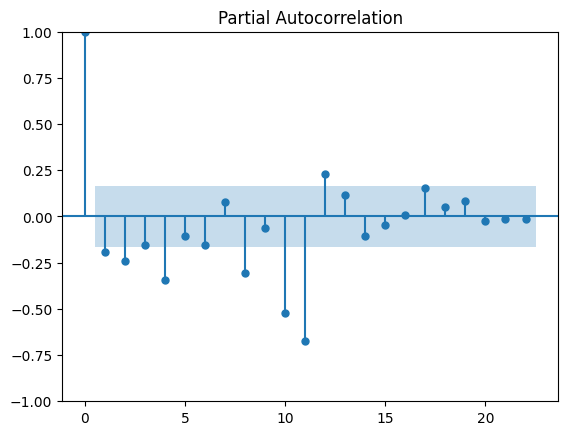

In [329]:
result = plot_pacf(df_airline['Passenger 2nd difference'].dropna())

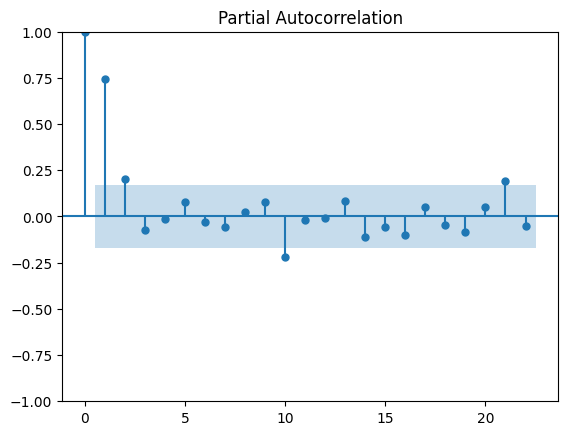

In [330]:
pacf12 = plot_pacf(df_airline['Passenger 12 difference'].dropna())

In [331]:
# Split train and test data
df_airline

,Thousands of Passengers,Passenger first difference,Passenger 2nd difference,Passenger 12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [332]:
from datetime import datetime, timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [333]:
train_data = df_airline[: train_dataset_end]
test_data = df_airline[train_dataset_end+timedelta(days=1): test_dataset_end]

In [334]:
# Prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [335]:
test_data

,Thousands of Passengers,Passenger first difference,Passenger 2nd difference,Passenger 12 difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


# ARIMA Model
### Creat an ARIMA Model

In [336]:
train_data

,Thousands of Passengers,Passenger first difference,Passenger 2nd difference,Passenger 12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [337]:
from statsmodels.tsa.arima.model import ARIMA
Model_ARIMA = ARIMA(train_data['Thousands of Passengers'], order=(10, 2, 0))


c:\Users\HP\anaconda3\envs\python_new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\envs\python_new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\envs\python_new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [338]:
Model_ARIMA_fit = Model_ARIMA.fit()

In [339]:
Model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                     Wed, 26 Jun 2024   AIC                            736.477
Time:                             13:02:21   BIC                            762.951
Sample:                         01-01-1949   HQIC                           747.106
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [340]:
# Prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [341]:
test_data

,Thousands of Passengers,Passenger first difference,Passenger 2nd difference,Passenger 12 difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [342]:
pred = Model_ARIMA_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data['Thousands of Passengers']-pred

In [352]:
test_data

,Thousands of Passengers,Passenger first difference,Passenger 2nd difference,Passenger 12 difference,Predicted ARIMA,Predicted_ARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,300.183612,300.183612
1956-02-01,277.0,-7.0,-13.0,44.0,309.478354,309.478354
1956-03-01,317.0,40.0,47.0,50.0,316.443013,316.443013
1956-04-01,313.0,-4.0,-44.0,44.0,307.827542,307.827542
1956-05-01,318.0,5.0,9.0,48.0,318.544231,318.544231
1956-06-01,374.0,56.0,51.0,59.0,348.922079,348.922079
1956-07-01,413.0,39.0,-17.0,49.0,366.020285,366.020285
1956-08-01,405.0,-8.0,-47.0,58.0,346.567531,346.567531
1956-09-01,355.0,-50.0,-42.0,43.0,332.120966,332.120966


In [351]:
test_data['Thousands of Passengers']

Month
1956-01-01    284.0
1956-02-01    277.0
1956-03-01    317.0
1956-04-01    313.0
1956-05-01    318.0
1956-06-01    374.0
1956-07-01    413.0
1956-08-01    405.0
1956-09-01    355.0
1956-10-01    306.0
1956-11-01    271.0
1956-12-01    306.0
1957-01-01    315.0
1957-02-01    301.0
1957-03-01    356.0
1957-04-01    348.0
1957-05-01    355.0
1957-06-01    422.0
1957-07-01    465.0
1957-08-01    467.0
1957-09-01    404.0
1957-10-01    347.0
1957-11-01    305.0
1957-12-01    336.0
1958-01-01    340.0
1958-02-01    318.0
1958-03-01    362.0
1958-04-01    348.0
1958-05-01    363.0
1958-06-01    435.0
1958-07-01    491.0
1958-08-01    505.0
1958-09-01    404.0
1958-10-01    359.0
1958-11-01    310.0
1958-12-01    337.0
1959-01-01    360.0
1959-02-01    342.0
1959-03-01    406.0
1959-04-01    396.0
1959-05-01    420.0
1959-06-01    472.0
1959-07-01    548.0
1959-08-01    559.0
1959-09-01    463.0
1959-10-01    407.0
1959-11-01    362.0
1959-12-01    405.0
1960-01-01    417.0
1960-02-01    

In [349]:
pred

1956-01-01    300.183612
1956-02-01    309.478354
1956-03-01    316.443013
1956-04-01    307.827542
1956-05-01    318.544231
1956-06-01    348.922079
1956-07-01    366.020285
1956-08-01    346.567531
1956-09-01    332.120966
1956-10-01    307.734753
1956-11-01    311.623910
1956-12-01    339.828195
1957-01-01    349.840403
1957-02-01    356.098230
1957-03-01    350.687824
1957-04-01    350.080460
1957-05-01    361.157689
1957-06-01    381.216511
1957-07-01    382.319369
1957-08-01    372.852575
1957-09-01    364.110093
1957-10-01    356.108921
1957-11-01    371.293786
1957-12-01    385.323592
1958-01-01    392.077833
1958-02-01    391.405846
1958-03-01    388.404576
1958-04-01    391.572852
1958-05-01    402.448075
1958-06-01    413.255679
1958-07-01    410.853410
1958-08-01    407.670539
1958-09-01    402.486331
1958-10-01    406.089143
1958-11-01    418.125309
1958-12-01    426.012370
1959-01-01    429.205575
1959-02-01    427.352226
1959-03-01    428.150982
1959-04-01    432.790841


In [343]:
residuals

Month
1956-01-01    -16.183612
1956-02-01    -32.478354
1956-03-01      0.556987
1956-04-01      5.172458
1956-05-01     -0.544231
1956-06-01     25.077921
1956-07-01     46.979715
1956-08-01     58.432469
1956-09-01     22.879034
1956-10-01     -1.734753
1956-11-01    -40.623910
1956-12-01    -33.828195
1957-01-01    -34.840403
1957-02-01    -55.098230
1957-03-01      5.312176
1957-04-01     -2.080460
1957-05-01     -6.157689
1957-06-01     40.783489
1957-07-01     82.680631
1957-08-01     94.147425
1957-09-01     39.889907
1957-10-01     -9.108921
1957-11-01    -66.293786
1957-12-01    -49.323592
1958-01-01    -52.077833
1958-02-01    -73.405846
1958-03-01    -26.404576
1958-04-01    -43.572852
1958-05-01    -39.448075
1958-06-01     21.744321
1958-07-01     80.146590
1958-08-01     97.329461
1958-09-01      1.513669
1958-10-01    -47.089143
1958-11-01   -108.125309
1958-12-01    -89.012370
1959-01-01    -69.205575
1959-02-01    -85.352226
1959-03-01    -22.150982
1959-04-01    -36.7

<Axes: ylabel='Density'>

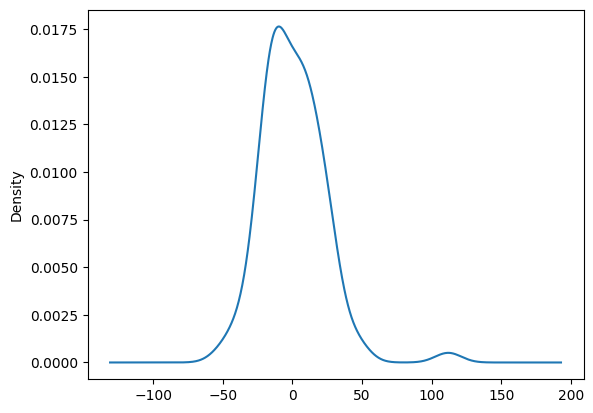

In [344]:
Model_ARIMA_fit.resid.plot(kind='kde')

In [346]:
test_data['Predicted_ARIMA'] = pred

C:\Users\HP\AppData\Local\Temp\ipykernel_7780\284031954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA'] = pred


In [347]:
test_data[['Thousands of Passengers', 'Predicted_ARIMA']]

,Thousands of Passengers,Predicted_ARIMA
Month,,
1956-01-01,284.0,300.183612
1956-02-01,277.0,309.478354
1956-03-01,317.0,316.443013
1956-04-01,313.0,307.827542
1956-05-01,318.0,318.544231
1956-06-01,374.0,348.922079
1956-07-01,413.0,366.020285
1956-08-01,405.0,346.567531
1956-09-01,355.0,332.120966


<Axes: xlabel='Month'>

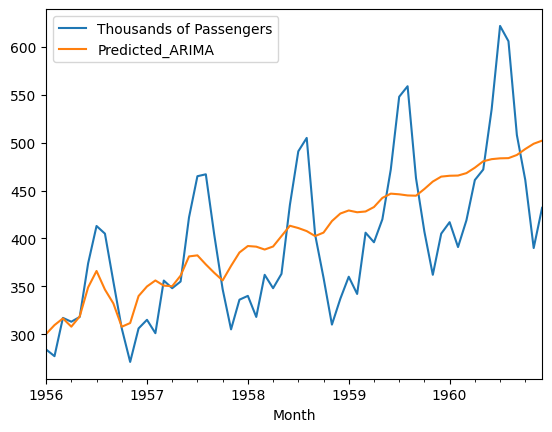

In [348]:
test_data[['Thousands of Passengers', 'Predicted_ARIMA']].plot()

In [353]:
# Forecasting
forecast = Model_ARIMA_fit.get_forecast(steps=12)

In [354]:
forecast

In [355]:
forecast_mean = forecast.predicted_mean

In [356]:
forecast_mean

1956-01-01    300.183612
1956-02-01    309.478354
1956-03-01    316.443013
1956-04-01    307.827542
1956-05-01    318.544231
1956-06-01    348.922079
1956-07-01    366.020285
1956-08-01    346.567531
1956-09-01    332.120966
1956-10-01    307.734753
1956-11-01    311.623910
1956-12-01    339.828195
Freq: MS, Name: predicted_mean, dtype: float64

# SARIMAX
### Create a SARIMAX Model

In [357]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
Model_SARIMAX = SARIMAX(train_data['Thousands of Passengers'], order=(3,0,5), seasonal_order=(1,1,1,12))

c:\Users\HP\anaconda3\envs\python_new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\anaconda3\envs\python_new\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [358]:
Model_SARIMAX_fit = Model_SARIMAX.fit()

c:\Users\HP\anaconda3\envs\python_new\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [360]:
Model_SARIMAX_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(1, 1, [1], 12)   Log Likelihood                -263.914
Date:                              Wed, 26 Jun 2024   AIC                            549.829
Time:                                      14:25:55   BIC                            574.872
Sample:                                  01-01-1949   HQIC                           559.799
                                       - 12-01-1955                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5572      3.374      0.165      0.869      -6.056       7.171
ar.L2          0.8514      0.385      2.212      0.027       0.097       1.606
ar.L3         -0.4197      3.071     -0.137      0.891      -6.439       5.600
ma.L1          0.2026      3.287      0.062      0.951      -6.241       6.646
ma.L2         -0.5162      2.426     -0.213      0.832      -5.272       4.240
ma.L3         -0.0931      0.714     -0.130      0.896      -1.493       1.307
ma.L4         -0.1899      0.543     -0.350      0.727      -1.254       0.874
ma.L5          0.1673      0.928      0.180      0.857      -1.651       1.986
ar.S.L12      -0.3126      0.868     -0.360      0.719      -2.014       1.388
ma.S.L12       0.1055      0.954      0.111      0.912      -1.764       1.975
sigma2        84.1002     32.906      2.556      0.011      19.605     148.595
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.88
Prob(Q):                              0.93   Prob(JB):                         0.39
Heteroskedasticity (H):               2.41   Skew:                             0.40
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""